In [70]:
# 基礎
import pandas as pd
import numpy as np
import math
import json
import os
import jieba  ## 斷字

# 視覺化
import matplotlib.pyplot as plt  ## python最常見的繪圖工具
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname=r'C:\Windows\Fonts\SimHei.ttf')  ## plt中文字
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA  ## 降維視覺化常用工具
from pylab import rcParams  ## 調整畫布比例


In [71]:
df = pd.read_csv(r'C:/Users/Z00043597/Desktop/text_UTF8_8.txt', encoding='utf-8', sep ='\t')

In [72]:
def preprocess(ans):
    # words = list(jieba.cut(question)) ## 精準模式
    words = list(jieba.cut(ans)) ## 全斷詞模式
    return words

In [73]:
df['words'] = df['ans'].apply(preprocess)

In [74]:
# 為了訓練需要，將類別轉化為數字類別(1~3類)
cat_mapping = {}
for num, cat in enumerate(list(set(df['cat']))):
    cat_mapping[cat] = num

In [75]:
cat_mapping

{'服務': 0, '基金': 1, '換匯': 2}

In [76]:
inversed_cat_mapping = {}
for cat, idx in cat_mapping.items():
    inversed_cat_mapping[idx] = cat

In [77]:
inversed_cat_mapping

{0: '服務', 1: '基金', 2: '換匯'}

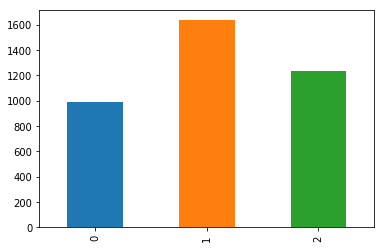

In [78]:
main_series = df.groupby('cat').count()['ans']
main_series.plot(kind='bar', use_index=False)
#plt.savefig(os.path.join('pic', 'nums_of_queries_each_cat'))
plt.show()

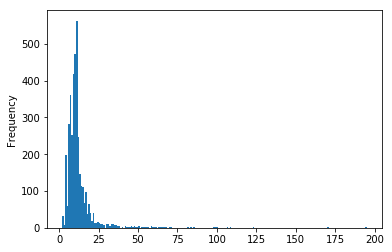

In [79]:
df['ans'].apply(len).plot(kind='hist', bins=200)
#plt.savefig(os.path.join('pic', 'length_of_queries'))
plt.show()

In [80]:
from wordcloud import WordCloud
from collections import Counter

服務


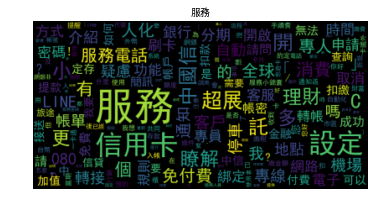

基金


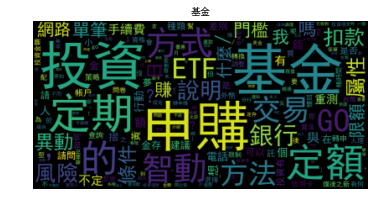

換匯


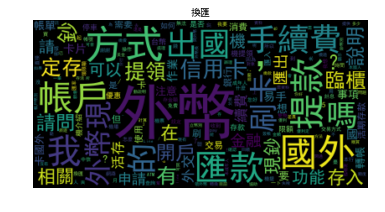

In [81]:
freqs = []
for cat in list(set(df['cat'])):
    words_Li = list(df[df['cat'] == cat]['words'])
    total_words_in_cat = []
    for words in words_Li:
        total_words_in_cat.extend(words)
    freq = Counter(total_words_in_cat)
    print(cat)
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\SimHei.ttf')
    wordcloud.generate_from_frequencies(frequencies=freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat, fontproperties=zhfont1)
  #  plt.savefig(os.path.join('pic', 'wordcloud_' + cat), bbox_inches='tight', pad_inches=0)
    plt.show()

In [82]:
total_li = []
for li in list(df['words']):
    total_li += li
vectorterms = list(set(total_li))

## 轉化每個問題變成向量
def vectorize(words):
    self_main_list = [0] * len(vectorterms)
    for term in words:
        if term in vectorterms:  ## 測試資料集當中的字不一訂有出現在訓練資料集中
            idx = vectorterms.index(term)
            self_main_list[idx] += 1
    return np.array(self_main_list)

X = np.concatenate(df['words'].apply(vectorize).values).reshape(-1, len(vectorterms))
Y = df['cat'].apply(cat_mapping.get)
print(X.shape)
print(Y.shape)

(3854, 2081)
(3854,)


In [83]:
from sklearn.model_selection import train_test_split  ## 切分鍊與測試資料集
from sklearn.neighbors import KNeighborsClassifier  ## KNN
from sklearn.svm import SVC  ## SVM
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Finally, we split some of the data off for validation
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_valid.shape)
print(Y_train.shape)
print(Y_valid.shape)

(3083, 2081)
(771, 2081)
(3083,)
(771,)


In [85]:
def get_accuracy(clf, *args):
    if args:
        clf = clf(kernel=args[0])  ## SVM在這邊用Llinear比較準
    else:
        clf = clf()
    clf = clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_valid)
    return (str(sum(Y_valid == y_pred)/Y_valid.shape[0]))

print('KNN: ', get_accuracy(KNeighborsClassifier))
print('SVM_rbf: ', get_accuracy(SVC))
print('SVM_linear: ', get_accuracy(SVC, 'linear'))

KNN:  0.9623865110246433


C:\Users\Z00043597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM_rbf:  0.7509727626459144
SVM_linear:  0.9857328145265889


In [86]:
#隨機森林
rf = RandomForestClassifier().fit(X_train, Y_train)
print(rf.score(X_valid, Y_valid))

C:\Users\Z00043597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9779507133592736


In [87]:
#kNN
knn = KNeighborsClassifier().fit(X_train, Y_train)
print(ovr_knn.score(X_valid, Y_valid))

0.9623865110246433


In [88]:
svm = SVC().fit(X_train, Y_train)
print(svm.score(X_valid, Y_valid))

C:\Users\Z00043597\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7509727626459144


In [89]:
svm_linear = SVC(kernel='linear').fit(X_train, Y_train)
print(svm_linear.score(X_valid, Y_valid))

0.9857328145265889


In [99]:
y_pred = svm_linear.predict(X)
df_y_pred = pd.DataFrame(y_pred)

In [ ]:
print(df_y_pred.iloc[:,0])

In [151]:
df_exam = df

In [152]:
df_exam = df_exam.drop(['words'], axis = 1)

In [153]:
df_exam['predict'] = df_y_pred

In [159]:
df_exam.loc[df_exam['predict'] == 2,'predict'] = '換匯'
df_exam.loc[df_exam['predict'] == 1,'predict'] = '基金'
df_exam.loc[df_exam['predict'] == 0,'predict'] = '服務'

In [173]:
df_exam.loc[df_exam['cat'] != df_exam['predict']]

,ans,cat,predict
59,轉服務人員,服務,換匯
72,南港軟體園區的提款機有提領外幣的服務嗎？,服務,換匯
85,您好：中國信託已收到您的信用卡eTag自動儲值/代繳eTag智慧停車費服務申請暨約定書，因車...,服務,換匯
661,請問符合出國停車條件時，如近90天團費達2萬，若月初與月終各出國1次，可同時使用此服務嗎？還...,服務,換匯
670,請問我有開啟國際提領功能嗎,服務,換匯
1025,外幣定存設定方式,服務,換匯
1089,外幣定存設定方式,服務,換匯
1145,外幣定存設定方式,服務,換匯
1161,外幣定存設定方式,服務,換匯
1169,外幣定存設定方式,服務,換匯
